# EXPLORATORY DATA ANALYSIS

Data Source: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

### Importing the libraries

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import warnings
%matplotlib inline

from pylab import rcParams
rcParams["figure.figsize"] = 15, 10


## Reading the EDA Cvs file

In [5]:

df = pd.read_csv('EDA_data.csv')
df.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,30.0,30.0,30.0,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,30.0,30.0,30.0,700 S HILL ST,NaN,34.0459,-118.2545
2,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,30.0,30.0,700 S BROADWAY,NaN,34.0452,-118.2534
3,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,30.0,30.0,30.0,15TH,OLIVE,34.0359,-118.2648
4,200100510,01/05/2020 12:00:00 AM,01/05/2020 12:00:00 AM,955,1,Central,111,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,30.0,30.0,30.0,800 N ALAMEDA ST,OLIVE,34.0615,-118.2412


### Checking the shape of the data

In [3]:

df.shape


(200378, 28)

## Columns in Data 

In [4]:

df.columns


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

### Extracted data consists of 200K (200378) along with 28 columns

DR_NO - Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.

DATE OCC - Date of crime occurrence(YYYY-MM-DD)

AREA - The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

AREA NAME - The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.

Rpt Dist No - Code that represents a sub-area within a Geographic Area.

Crm Cd - Indicates the crime committed.

Crm Cd Desc - Defines the Crime Code provided.

Vict Age - Indicates the age of the victim.

Vict Sex - F: Female M: Male X: Unknown

Vict Descent - Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

Premis Cd - The type of structure, vehicle, or location where the crime took place.

Premis Desc - Defines the Premise Code provided.

Weapon Used Cd - The type of weapon used in the crime.

Weapon Desc - Defines the Weapon Used Code provided.

LOCATION - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

LAT - Latitude Coordinate.

LON - Longitude Coordinate.

### Checking if the dataset has any null values

In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200378 entries, 0 to 200377
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           200378 non-null  int64  
 1   Date Rptd       200378 non-null  object 
 2   DATE OCC        200378 non-null  object 
 3   TIME OCC        200378 non-null  int64  
 4   AREA            200378 non-null  int64  
 5   AREA NAME       200378 non-null  object 
 6   Rpt Dist No     200378 non-null  int64  
 7   Part 1-2        200378 non-null  int64  
 8   Crm Cd          200378 non-null  int64  
 9   Crm Cd Desc     200378 non-null  object 
 10  Mocodes         200378 non-null  object 
 11  Vict Age        200378 non-null  int64  
 12  Vict Sex        200378 non-null  object 
 13  Vict Descent    200378 non-null  object 
 14  Premis Cd       200378 non-null  float64
 15  Premis Desc     200378 non-null  object 
 16  Weapon Used Cd  200378 non-null  float64
 17  Weapon Des

In [6]:

df.isna().sum()


DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      3
LAT               0
LON               0
dtype: int64

The dataset contains only three null values that also in Cross Street which can be ignored because the data contains 200K rows and 28 columns.

## Descriptive statistics for Numerical columns

In [7]:

df.describe()


,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.003780e+05,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000,200378.000000
mean,2.102554e+08,1351.535987,10.510355,1097.237865,1.545220,507.297118,34.469048,313.177300,361.379697,506.586671,157.963484,36.376458,30.186488,33.920541,-117.848849
std,7.940633e+06,673.198024,6.211493,619.734302,0.497952,240.614598,17.869807,214.714775,124.195874,240.107025,320.890655,77.824900,13.373951,2.193052,7.610327
min,1.030447e+07,1.000000,1.000000,101.000000,1.000000,110.000000,-1.000000,101.000000,101.000000,110.000000,30.000000,30.000000,30.000000,0.000000,-118.667200
25%,2.015070e+08,910.000000,5.000000,524.000000,1.000000,230.000000,24.000000,102.000000,308.000000,230.000000,30.000000,30.000000,30.000000,33.996900,-118.402200
50%,2.108085e+08,1435.000000,11.000000,1162.000000,2.000000,624.000000,33.000000,210.000000,400.000000,624.000000,30.000000,30.000000,30.000000,34.050100,-118.304600
75%,2.202061e+08,1915.000000,16.000000,1619.000000,2.000000,626.000000,46.000000,502.000000,400.000000,626.000000,30.000000,30.000000,30.000000,34.118100,-118.269600
max,2.299050e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


## Statistics for Categorical columns in Data

In [8]:

df.describe(exclude = np.number)


,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street
count,200378,200378,200378,200378,200378,200378,200378,200378,200378,200378,200378,200378,200375
unique,986,986,21,115,137749,4,19,296,78,5,5,34206,5275
top,07/04/2021 12:00:00 AM,01/01/2020 12:00:00 AM,77th Street,BATTERY - SIMPLE ASSAULT,0416,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,6TH,BROADWAY
freq,283,447,18025,45041,2155,97346,91647,42908,107158,122392,122392,650,3884


#### Unique Crimes in Los-Angeles

In [21]:
df['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT', 'RAPE, FORCIBLE',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'ROBBERY',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'THEFT, PERSON', 'BATTERY WITH SEXUAL CONTACT',
       'BATTERY POLICE (SIMPLE)', 'BURGLARY',
       'VIOLATION OF RESTRAINING ORDER', 'OTHER MISCELLANEOUS CRIME',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'ATTEMPTED ROBBERY', 'OTHER ASSAULT', 'BOMB SCARE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'SEXUAL PENETRATION W/FOREIGN OBJECT',
       'SHOTS FIRED AT INHABITED DWELLING',
       'THEFT FROM MOTOR 

## Crimes in Los Angeles

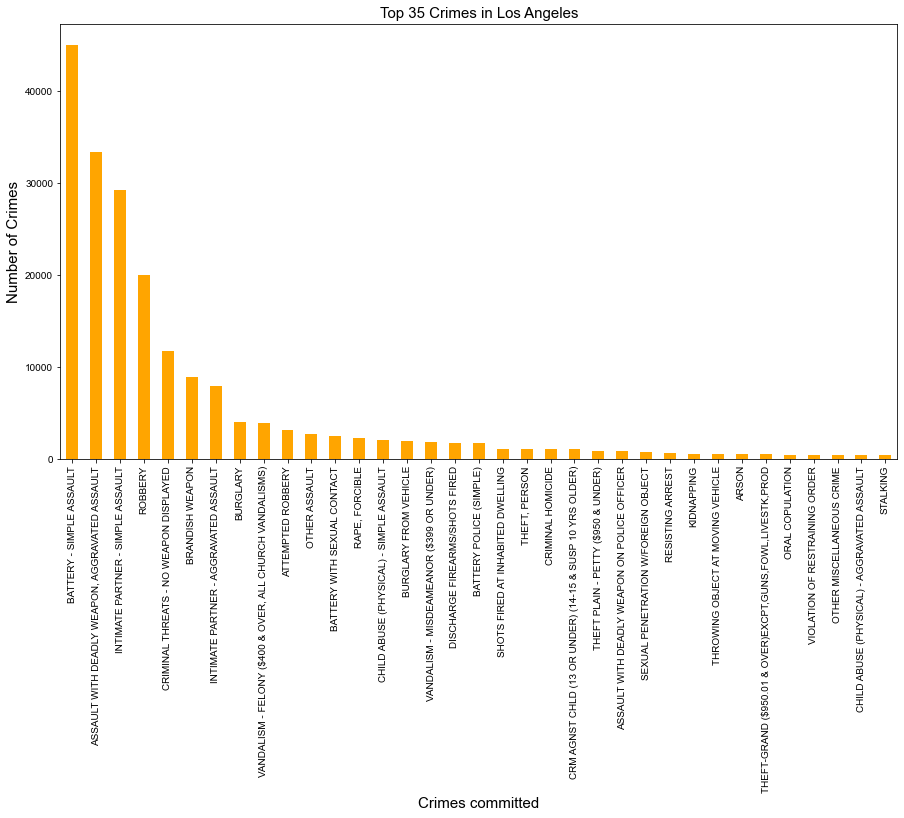

In [9]:

df['Crm Cd Desc'].value_counts().head(35).plot.bar( figsize = (15, 8),color='orange')
plt.style.use('seaborn')

plt.title('Top 35 Crimes in Los Angeles', fontweight = 30, fontsize = 15)
plt.xlabel('Crimes committed',fontsize = 15)
plt.ylabel('Number of Crimes',fontsize = 15)
plt.show()


## Analysis

The analysis shows the top 35 Crimes that are commited in Los-Angeles
1. Battery- Simple Assault is the highest with nearly 50k crimes registered
2. ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT shands the second around 35k crimes are registered which is almost double to Criminal-Threats where no weapons are displayed crime which stands fourth in the total number of crimes.
3. The third crime is with their partner which is reported as Intimate partner Crime - Simple Assault which are nearly 30k 
4. Crime that occurs rarely is Forgery and Theft above 950 dollars.
5. Stalking is also reported which stands 35 in crimes

## Crime occured in a particular AREA

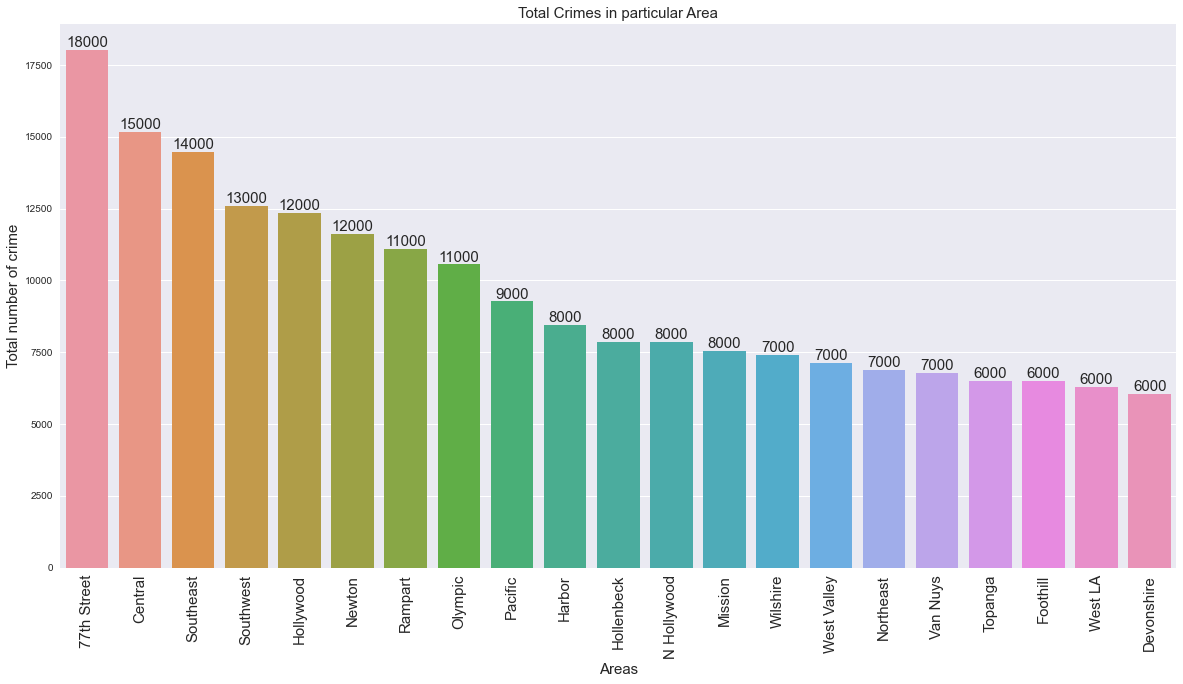

In [10]:

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

#fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(6,8))

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(df["AREA NAME"].value_counts().index, df["AREA NAME"].value_counts(), ax=ax)

ax.set_title("Total Crimes in particular Area",fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 15 )
ax.set_xlabel("Areas",fontsize = 15)
ax.set_ylabel("Total number of crime",fontsize = 15)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -3), fontsize=15, ha='center', va='bottom')
sns.despine()

## Analysis

From the above visualization we can describe how many crimes had happened in a particular area
1. 77th Street is where the highest number of crimes i.e 18k crimes which is exactly double to the crimes that occured in the pacific area i.e 9k crimes
2. Central area stands the second with 15k crimes 
3. The Southeast area in Los- Angeles stands 3rd with highest crime reported with 14k which is twice the crimes that occured in West Valley, Wilshire, Northeast and Van Nuys.
4. The Hollywood also stands 5th with 12K crimes.
5. Devonshire, West LA, Topanga and Fonthill stands last with 6k crimes which not a small number but compared to other areas they have less number of crimes.

## Date's top 30 Crimes

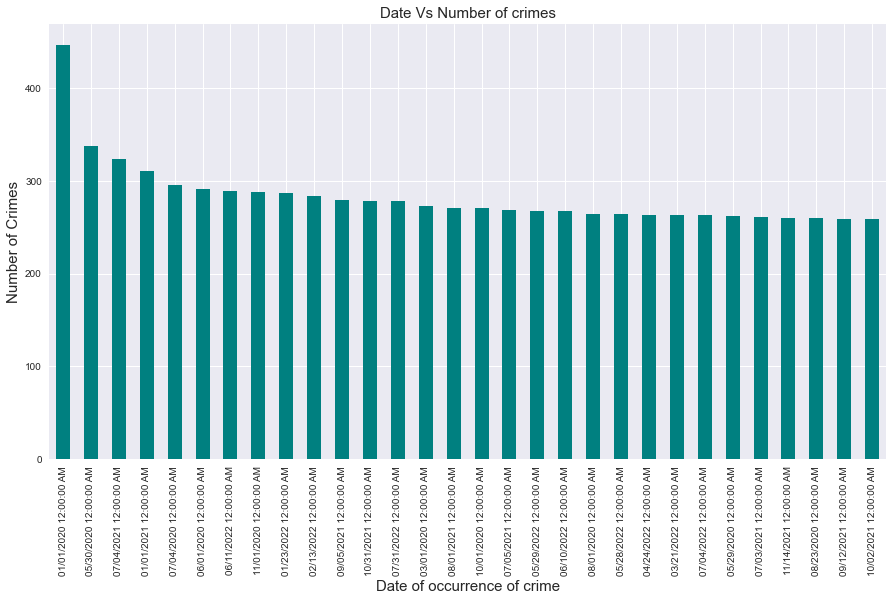

In [11]:
df['DATE OCC'].value_counts().head(30).plot.bar(color = 'teal', figsize =(15,8))
plt.title('Date Vs Number of crimes', fontweight = 30, fontsize = 15)
plt.xlabel('Date of occurrence of crime',fontsize = 15)
plt.ylabel('Number of Crimes',fontsize = 15)
plt.show()

## Analysis

In this visualization shows the highest nuber of crimes that are occured in a particular. We are going to extract top 30
1. 01/01/2020 What ?
Yes on New Year 2020 the highest number of crimes occured which are around 500 crimes.
2. All the extracted dates has a minimum of 250 crimes occured in a particular date. To be specific the crimes are nearly 300 or above it. Which is a bit scary.
3. 05/30/2020
Stands second. Top 2 crimes are reported in the same year that is 2020. On this particular day around 350 crimes are reported.
4. 07/04/2021
This day around 330 crimes occured. This day stands in first place in 2021 year and 3rd with overall. 
5. 06/11/2022 and 07/04/2022
First date and second date is the highest and least number of crimes that occured in 2022. 

## Premise Description

In [12]:
!pip install squarify
import squarify

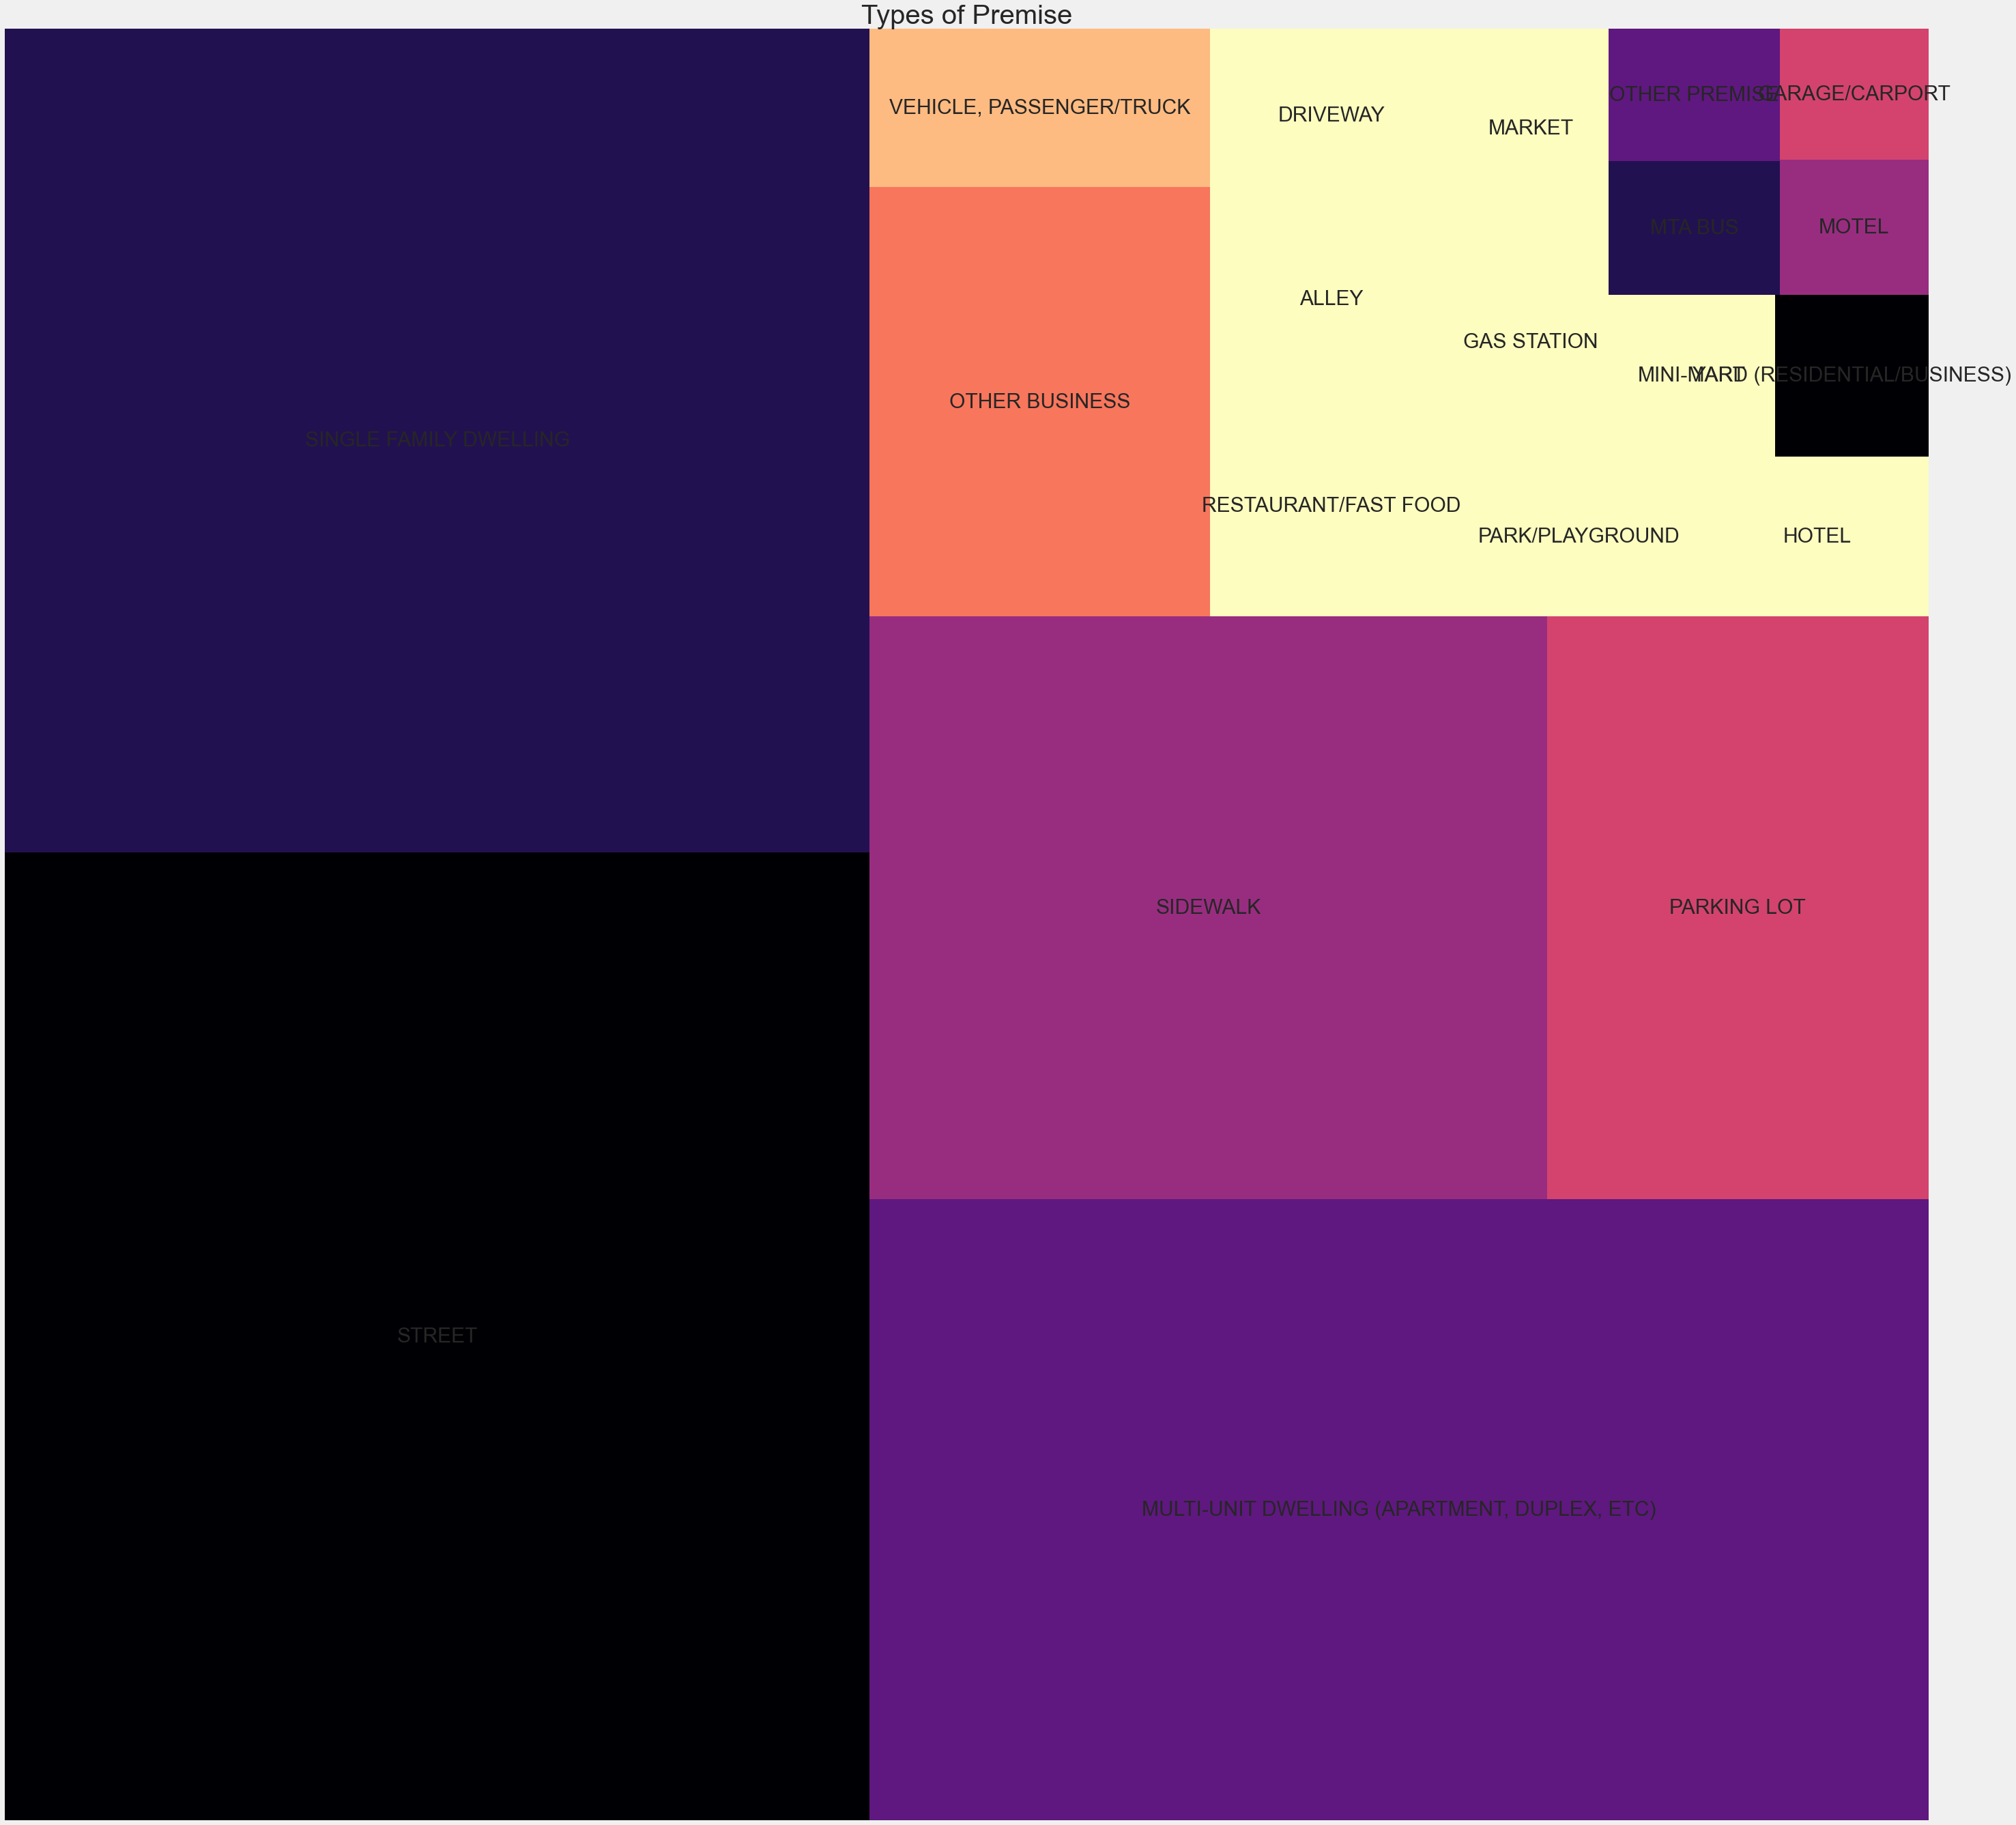

In [13]:

#Plotting a tree map
import numpy as np
y = df['Premis Desc'].value_counts().head(20)
    
plt.rcParams['figure.figsize'] = (45, 45)
plt.style.use('fivethirtyeight')
color = plt.cm.magma(np.linspace(0, 2, 15))

squarify.plot(sizes = y.values, label = y.index, alpha=1, color = color,text_kwargs={'fontsize':30})
plt.title('Types of Premise', fontsize = 40)
plt.axis('off')
plt.show()


## Analysis

Tree map shows types of premise where crime had occured mostly.
1. Streets are becoming the most dangerous place where the crime had occured the most.
2. Single Family Dwelling is the premise where second highest crimes occured
3. Multi-Unit Dwelling like Apartments, Duplex stands third according to the tree map
4. Side walk and parking lot stands fourth and fifth premise where chances of crime occurance is high
5. Restaurants, Gas stations, Drive way, Market and a lot other premises 

## Different types of Weapon Used in Crime

Text(0, 0.5, 'Weapon used on number of victims')

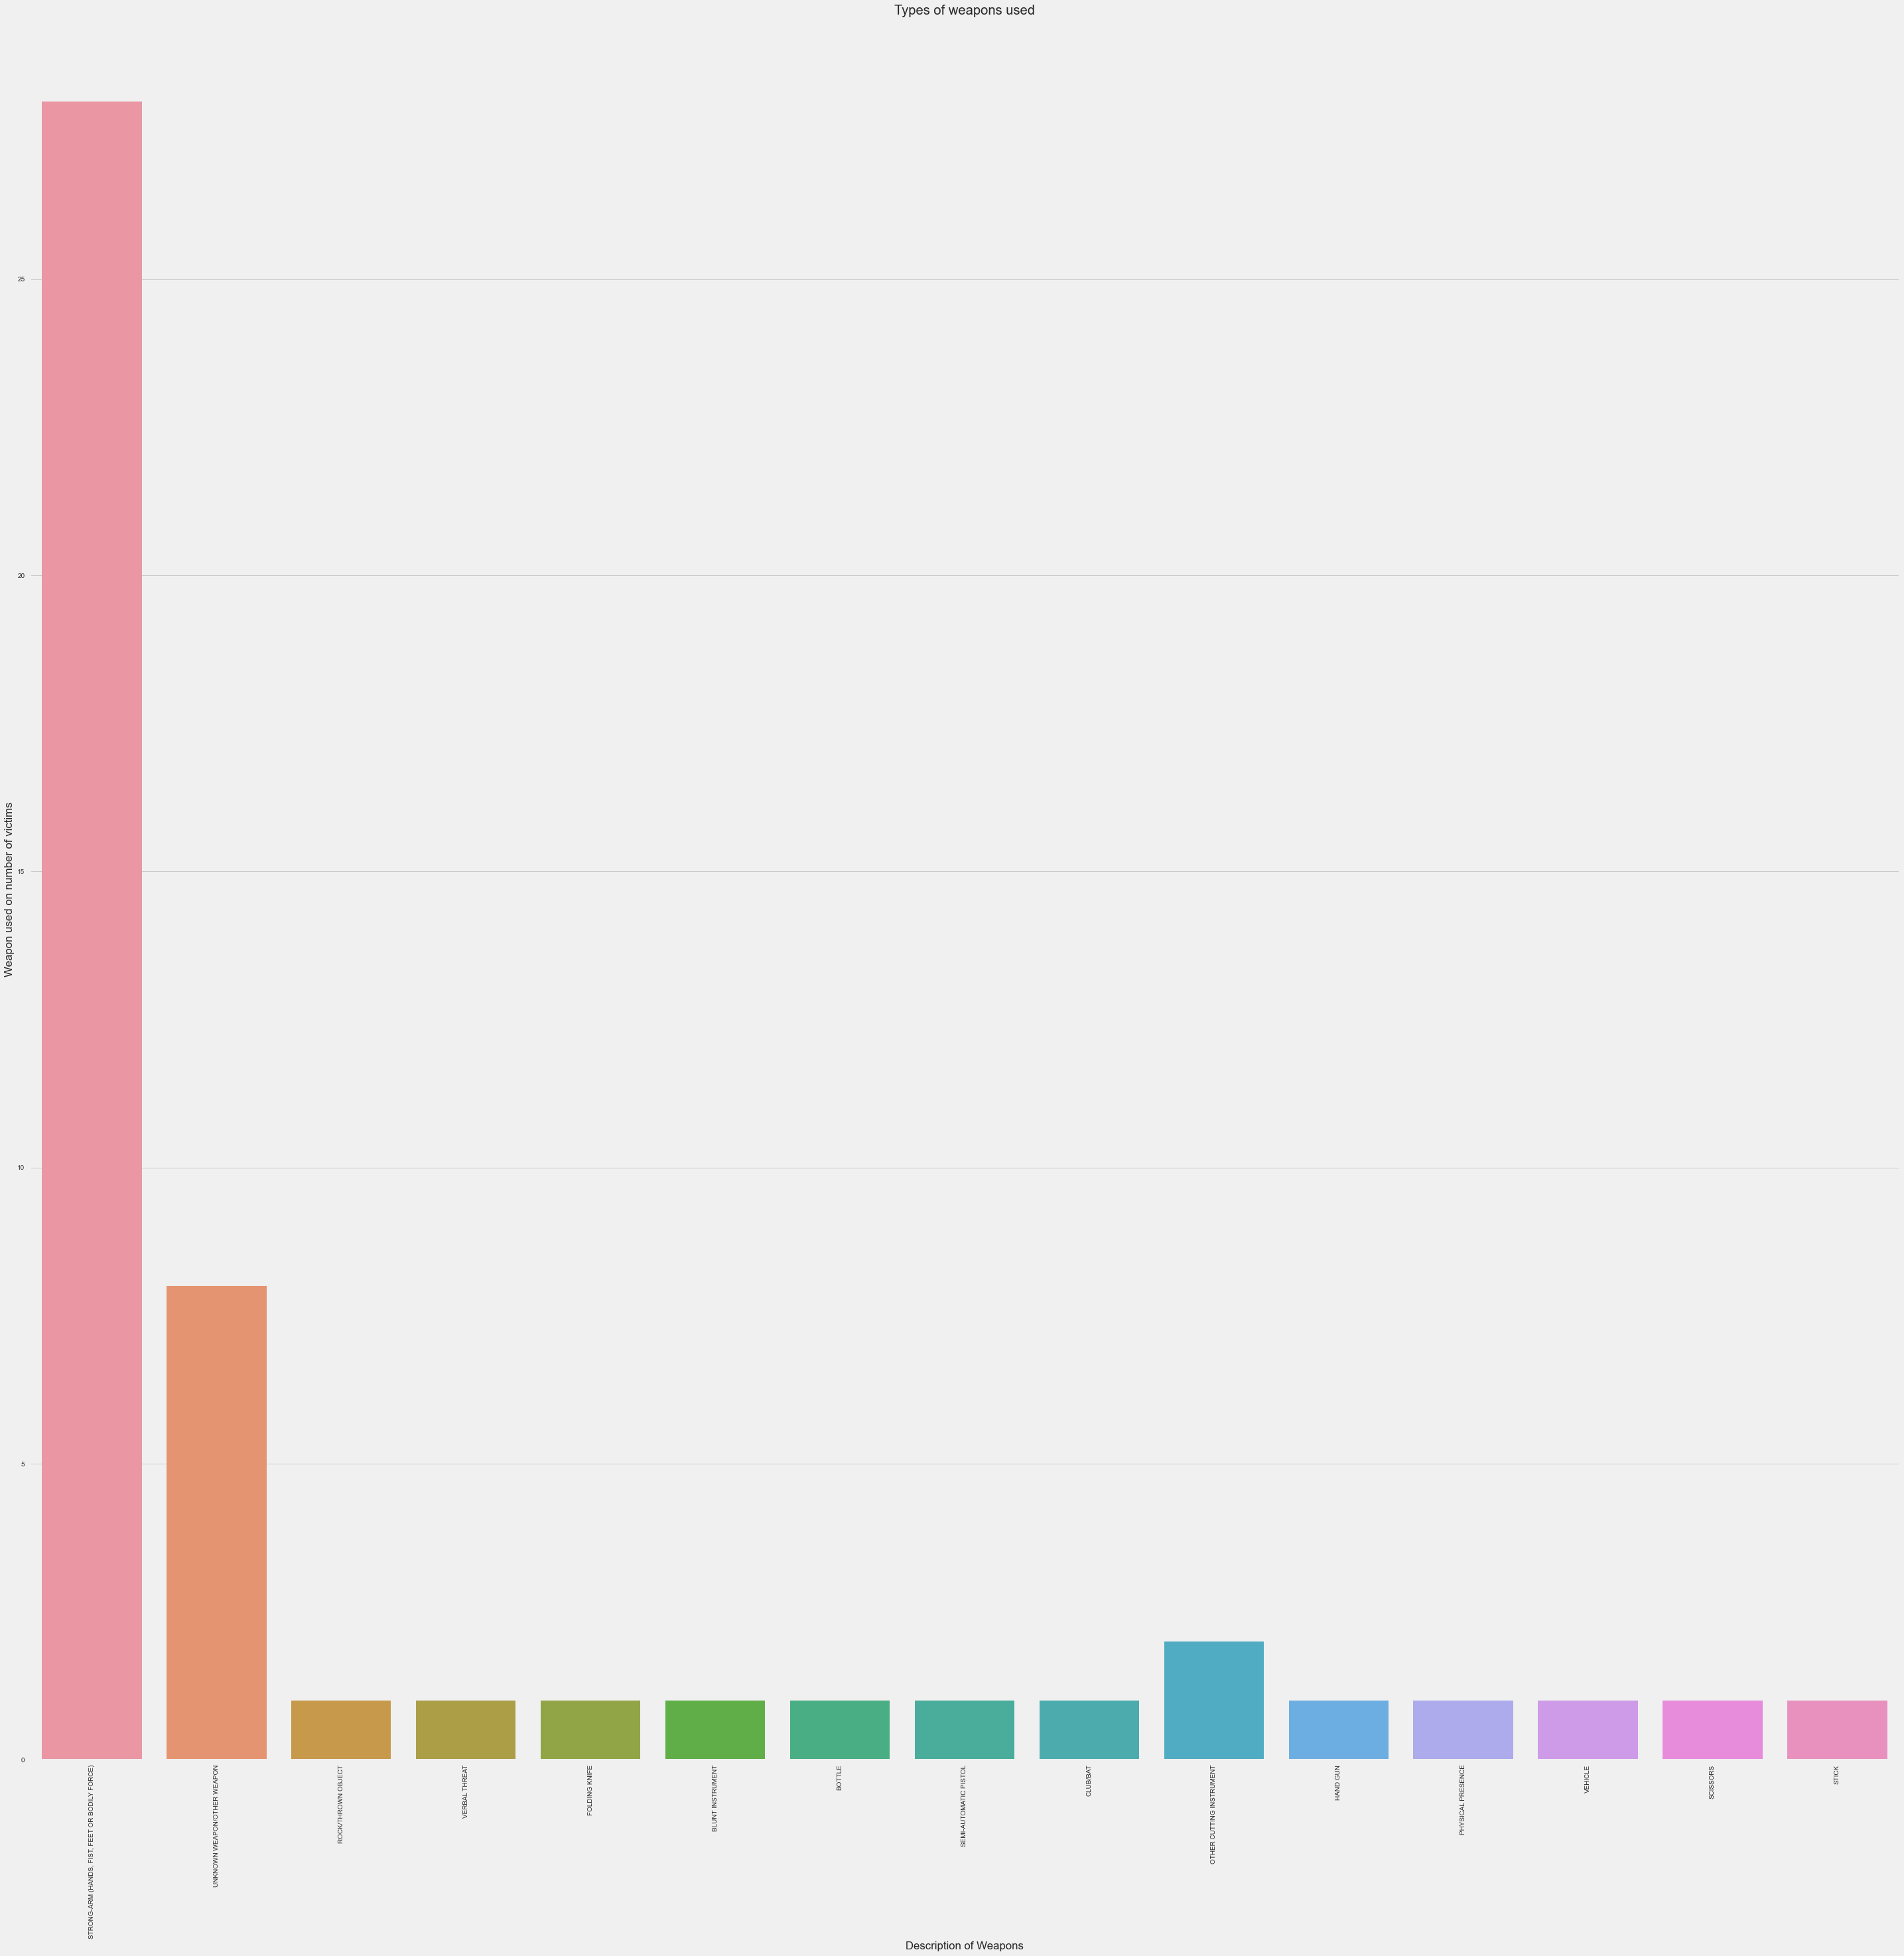

In [14]:

ax =sns.countplot(df['Weapon Desc'].head(50))
plt.xticks(rotation=90)
plt.title('Types of weapons used');
ax.set_xlabel('Description of Weapons')
ax.set_ylabel('Weapon used on number of victims')


## Analysis

The above bar graph show the description of the weapons used in the crime
1. Bodily force shuch as Strong-Arms, hands, fist or feet are used against the victim stands first
2. Rock and Thrown object stands second. That means any  unknow object which might be available at premises might be used
3. Verbal threat is also reported as many times and stands 3rd in weapons description.
4. Floding knife stands 4th as no one has a idea whether a person is carrying or not but very dangerous.
5. There are lot of crimes where the weapons are unknow which means the one who is committing the crime has used the object which are convenient to them at the premises. We cannont guess or predict the weapons after my complete analysis on the data what evere we predict is just 50% of what we have just to get the idea. We cannot expect or guess 100% of the weapon to be cautions about.

## Weapon Code

<AxesSubplot:xlabel='Weapon Used Cd', ylabel='Density'>

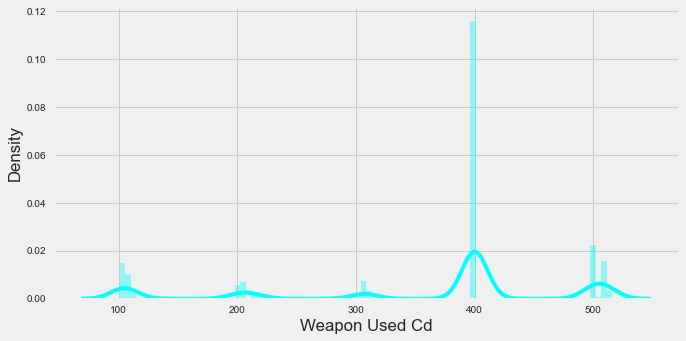

In [15]:
#plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10, 5)


fig, ax = plt.subplots()
sns.distplot(df["Weapon Used Cd"].dropna(), bins=90, color='cyan', ax=ax)

## Victim Sex

<AxesSubplot:ylabel='Vict Sex'>

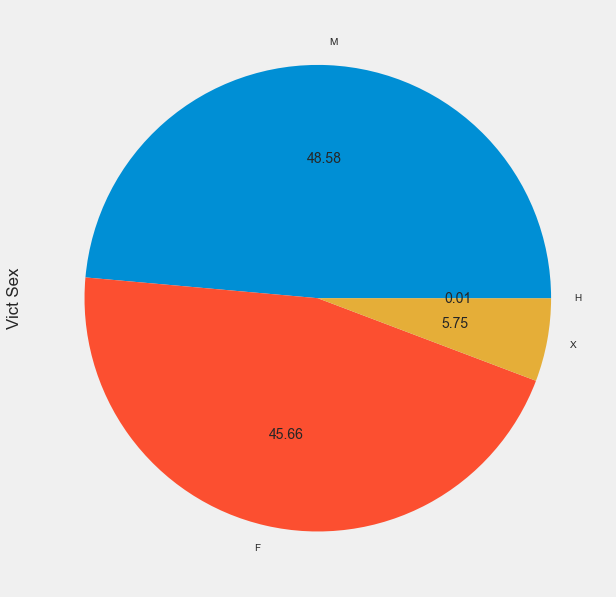

In [16]:
df['Vict Sex'].value_counts().plot(kind = 'pie',autopct='%.2f',figsize=(20,10))

## Analysis

Pie chart shows the percentage of victim according to there gender
Before this visualization I always had a myth that female victims are more but by this analysis I was a bit shock that male victims are more in number than female victims i.e around 48.58% which is 3% more than female victims which is indicated by F, M as Male and X is the unknow gender but there are around 5.75% effected victims

## Correlation between the columns

In [18]:
Col_Corr = df.corr()
Col_Corr

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
DR_NO,1.000000,-0.014461,0.063181,0.063412,-0.006992,-0.003558,-0.009261,0.013218,-0.014573,-0.003556,-0.003160,-0.003882,-0.003013,0.023041,-0.022066
TIME OCC,-0.014461,1.000000,0.019932,0.019980,0.019730,0.017498,0.003850,-0.018045,-0.006240,0.017682,-0.012885,-0.002375,0.000251,0.006511,-0.006602
AREA,0.063181,0.019932,1.000000,0.999111,0.003622,-0.002966,-0.000062,0.006843,-0.018760,-0.003527,0.024679,0.020443,0.000406,0.021968,-0.014049
Rpt Dist No,0.063412,0.019980,0.999111,1.000000,0.003908,-0.002796,-0.000014,0.007078,-0.018357,-0.003354,0.024306,0.020481,0.000447,0.021851,-0.014019
Part 1-2,-0.006992,0.019730,0.003622,0.003908,1.000000,0.794100,0.045719,0.208522,0.441907,0.795979,-0.242600,-0.070177,-0.013816,-0.038040,0.040182
Crm Cd,-0.003558,0.017498,-0.002966,-0.002796,0.794100,1.000000,0.044820,0.197655,0.378900,0.998516,-0.126608,0.016648,-0.000376,-0.029693,0.031454
Vict Age,-0.009261,0.003850,-0.000062,-0.000014,0.045719,0.044820,1.000000,0.017074,0.084235,0.046089,-0.077933,-0.014105,0.000497,0.000922,-0.000696
Premis Cd,0.013218,-0.018045,0.006843,0.007078,0.208522,0.197655,0.017074,1.000000,0.208371,0.197654,-0.047469,0.004765,0.002771,-0.004411,0.006080
Weapon Used Cd,-0.014573,-0.006240,-0.018760,-0.018357,0.441907,0.378900,0.084235,0.208371,1.000000,0.379791,-0.232279,-0.041206,-0.009116,-0.014214,0.016374
Crm Cd 1,-0.003556,0.017682,-0.003527,-0.003354,0.795979,0.998516,0.046089,0.197654,0.379791,1.000000,-0.132766,0.011033,-0.005445,-0.029829,0.031581


<AxesSubplot:>

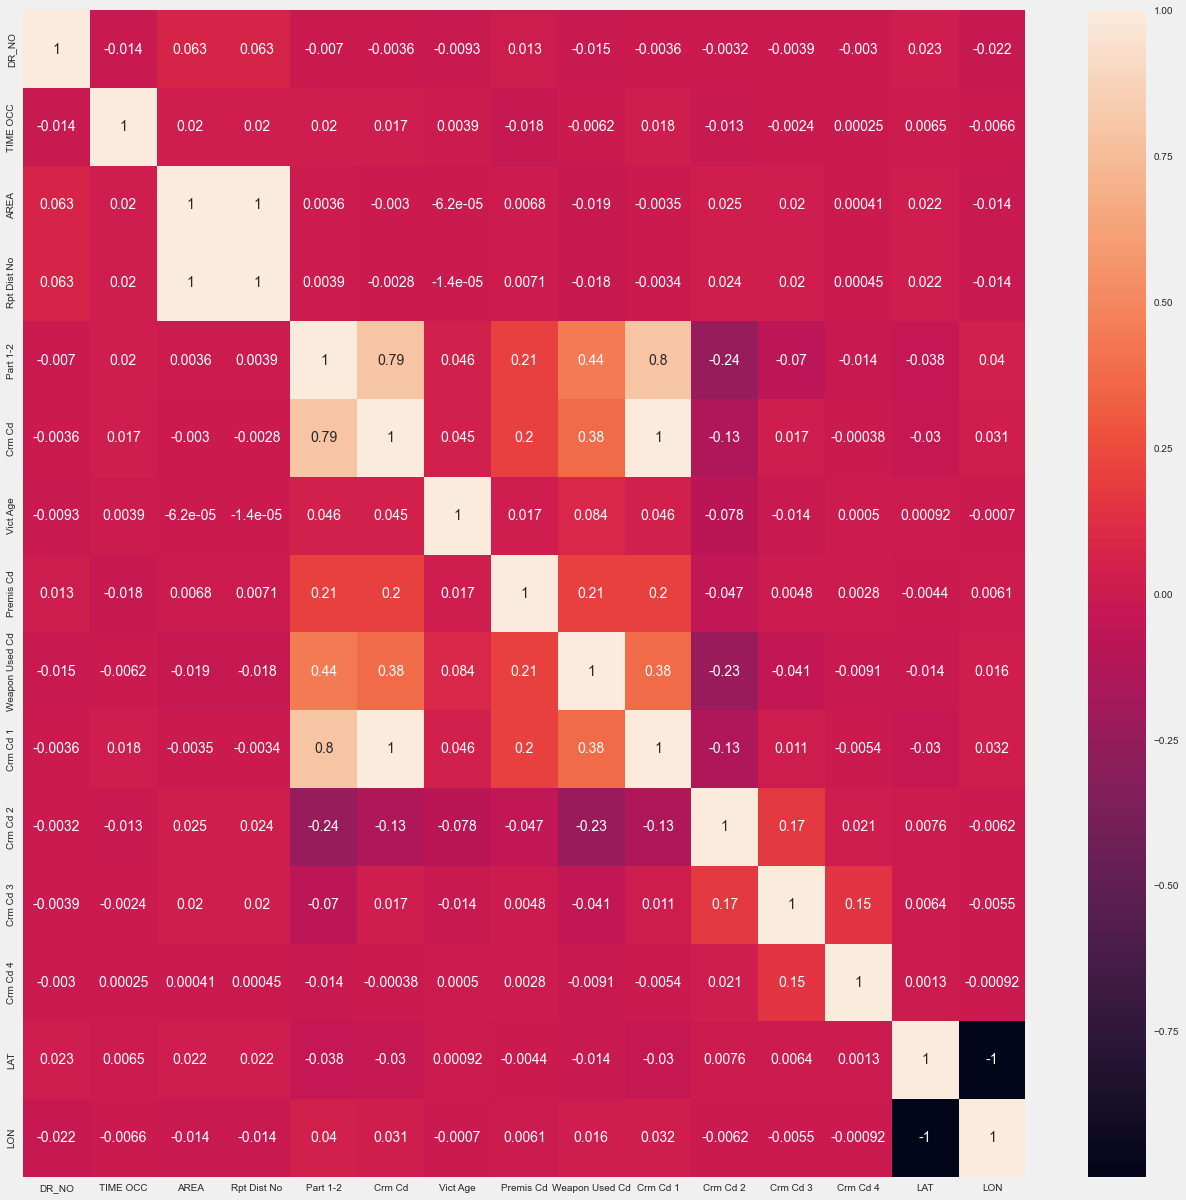

In [19]:
Features = Col_Corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[Features].corr(),annot=True)

## Summary

1. Male victims are more than female victims.
2. Battery- Simple Assault is the highest with nearly 50k crimes registered.
3. Streets are becoming the most dangerous place since the crime had occured the most.
4. In 2021 the highest number of crime that occured in a particular day are 330 crimes.
5. Bodily force shuch as Strong-Arms, hands, fist or feet are the weapons that are used against the victim.
6. New Year 2020 the highest number of crimes occured which are around 500 crimes.
7. 7th Street in Los-Angeles is where the highest number of crimes i.e 18k crimes. 